# Deep Learning aplicado a un guión de película

In [1]:
import pandas as pd

## Importación del guión a Df

In [2]:
# Leer el archivo CSV
df = pd.read_csv("subtitulos.csv", encoding="utf-8")

In [3]:
# Mostrar todo el contenido en varias filas para cada columna
pd.set_option('display.max_colwidth', None)
df.sample(5)

,inicio,fin,subtitulo
1189,"01:44:10,803","01:44:15,349","""Dile lo que ha ganado, Bob"", ""¡Un matrimonio!"""
795,"01:04:39,856","01:04:42,191",No te preocupes.
1072,"01:32:20,181","01:32:22,058",Exacto. Larguémonos.
1398,"02:04:39,425","02:04:41,094",Fuiste tú.
503,"00:40:40,345","00:40:43,181","Ray, deséame suerte."


In [4]:
df.shape

(1486, 3)

## NLP

In [5]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import string

In [6]:
# Cargar modelo de español
# ver otros como: es_core_news_sm, es_core_news_md, es_core_news_lg
nlp = spacy.load("es_core_news_sm")

### Limpieza

Genero columna 'subtituloLimpio' en minúsculas y sin puntuación

In [7]:
# Función para limpiar el texto: convertir a minúsculas y eliminar puntuación
def limpiar_texto1(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

In [8]:
import re

def limpiar_texto2(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres no deseados pero mantener `?`, `%`
    texto = re.sub(r'[^\w\s?%¿!¡]', '', texto)
    # Eliminar espacios redundantes
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [9]:
# Aplicar limpieza al subtítulo
df['subtituloLimpio2'] = df['subtitulo'].apply(limpiar_texto2)

### Tokenización

Tokenizo los subtítulos en una nueva columna 'tokens'.

In [10]:
# Tokenizar cada subtítulo usando SpaCy
df["tokens"] = df["subtituloLimpio2"].apply(lambda text: [token.text for token in nlp(text)])

In [11]:
# Limpieza de tokens en blanco
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token.strip() != ""])

Comparativa

In [12]:
df[["subtitulo","subtituloLimpio2", "tokens"]].sample(5)

,subtitulo,subtituloLimpio2,tokens
106,Así es como uno se hace grande.,así es como uno se hace grande,"[así, es, como, uno, se, hace, grande]"
1298,Es una buena oportunidad para ti. Utilízala bien.,es una buena oportunidad para ti utilízala bien,"[es, una, buena, oportunidad, para, ti, utilízala, bien]"
1166,- ¿Cómo está tu cabeza? - Fatal.,¿cómo está tu cabeza? fatal,"[¿, cómo, está, tu, cabeza, ?, fatal]"
222,Jerry.,jerry,[jerry]
1146,Señoras y señores: El señor y la señora Maguire.,señoras y señores el señor y la señora maguire,"[señoras, y, señores, el, señor, y, la, señora, maguire]"


### Sin Stopwords

Genero columna 'tokensSinStopwords'

In [13]:
# Eliminar stopwords de los tokens
df["tokensSinStopwords"] = df["tokens"].apply(lambda tokens: [token for token in tokens if not nlp.vocab[token].is_stop])
# df['tokensSinStopwords'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in STOP_WORDS])

In [14]:
df[["subtitulo", "tokens","tokensSinStopwords"]].sample(5)

,subtitulo,tokens,tokensSinStopwords
1039,Os voy a enseñar una cosa.,"[os, voy, a, enseñar, una, cosa]","[enseñar, cosa]"
717,¿Un futbolista? Soy un maestro de cole que te dará una paliza.,"[¿, un, futbolista, ?, soy, un, maestro, de, cole, que, te, dará, una, paliza]","[¿, futbolista, ?, maestro, cole, dará, paliza]"
665,Los dos juntos. ¿Te enteras?,"[los, dos, juntos, ¿, te, enteras, ?]","[juntos, ¿, enteras, ?]"
850,"Dios, ayúdame.","[dios, ayúdame]","[dios, ayúdame]"
1449,Tu padre se fue el día de Noche Buena y dejó a la familia.,"[tu, padre, se, fue, el, día, de, noche, buena, y, dejó, a, la, familia]","[padre, noche, familia]"


### Lematización

Aplico lematización para generar una nueva columna: tokensLematizados

In [15]:
# Lematizar los tokens sin stopwords
df["tokensLematizados"] = df["tokensSinStopwords"].apply(lambda tokens: [nlp(token)[0].lemma_ for token in tokens])

In [16]:
df[["subtitulo", "tokens","tokensSinStopwords","tokensLematizados"]].sample(5)

,subtitulo,tokens,tokensSinStopwords,tokensLematizados
1383,Intenta levantarse.,"[intenta, levantarse]","[intenta, levantarse]","[intentar, levantar él]"
1252,Ven aquí.,"[ven, aquí]",[ven],[ver]
1453,"- No voy a llorar, Roy. - Bueno, tengo buenas noticias.","[no, voy, a, llorar, roy, bueno, tengo, buenas, noticias]","[llorar, roy, noticias]","[llorar, roy, noticia]"
831,Demuéstrales que disfrutas el juego.,"[demuéstrales, que, disfrutas, el, juego]","[demuéstrales, disfrutas, juego]","[demuéstral, disfruta, juego]"
935,No es que mi matrimonio con Roger fuera bueno. Incluso antes.,"[no, es, que, mi, matrimonio, con, roger, fuera, bueno, incluso, antes]","[matrimonio, roger]","[matrimonio, roger]"


Se observa un problema con los sustantivos propios como los nombres de ciudades: 'Dallas' termina lematizado como 'dalla' y se debe considerar en algún analisis posterior.

## Análisis de Sentimiento

### TextBlob

In [17]:
from textblob import TextBlob

# Función para obtener la polaridad del sentimiento
def sentimientoTextblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Devuelve el puntaje de polaridad (-1 a 1)

In [18]:
# Aplicar el análisis de sentimiento a los subtítulos originales
df['sentimiento'] = df['subtitulo'].apply(sentimientoTextblob)

In [19]:
df[["subtitulo", "sentimiento"]].sample(5)

,subtitulo,sentimiento
309,"He de ser sincero, esto me duele profundamente.",0.0
608,- Preferiría lealtad. - ¿Qué dijimos cuando nos conocimos?,0.0
1145,"Hola, Dorothy, ven aquí.",0.0
1459,Quiero a mis hijos. Tyson y mi nuevo bebé.,0.0
528,"Quiero presentaros a Rod Tidwell, 110 recepciones, 1.550 yardas.",0.0


In [20]:
df[["sentimiento"]].describe()

,sentimiento
count,1486.000000
mean,-0.000585
std,0.055696
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.600000


Me parece demasiado neutral el análisis de sentimiento.

### Sentimiento TextBlob por Sentence

In [21]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Genero columna 'sentimientoSentence' de cada subtítulo como promedio de la evaluación de cada Oración.

In [22]:
from textblob import TextBlob

def sentimiento_frases(text):
    sentences = TextBlob(text).sentences
    return sum(sentence.sentiment.polarity for sentence in sentences) / len(sentences)

df['sentimientoSentence'] = df['subtitulo'].apply(sentimiento_frases)

In [23]:
pd.set_option('display.max_colwidth', None)

df[['sentimientoSentence','subtitulo']].sample(5)

,sentimientoSentence,subtitulo
727,0.0,Todos ellos a mucha distancia de un buen libro y un baño caliente.
1290,0.0,Sólo fue una declaración de objetivos.
958,0.0,"Por favor, sí."
1064,0.0,Seguiremos a flote. No te vayas.
734,0.0,- Te haré un bocadillo de jamón. - Quiero decirte algo.


In [24]:
df['sentimientoSentence'].describe()

count    1486.000000
mean        0.000177
std         0.041927
min        -0.700000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.600000
Name: sentimientoSentence, dtype: float64

Sigue teniendo peso el sentimiento neutral.

### Análisis de Sentimiento con VADER

Buscando otro método que quizás me realice una mejor clasificación de sentimientos es que voy a probar VADER.

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Asegúrate de que los datos necesarios estén descargados
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
sia = SentimentIntensityAnalyzer()

def sentimiento_vader(text):
    scores = sia.polarity_scores(text)
    return scores['compound']  # Devuelve el puntaje general de sentimiento

df['sentimientoVader'] = df['subtitulo'].apply(sentimiento_vader)

In [27]:
df[['sentimientoVader', 'subtitulo']].sample(5)

,sentimientoVader,subtitulo
1456,0.000,"11,2 millones y jugarás en tu propio estado."
1024,0.000,"Perdona, es que estoy embarazada."
544,0.000,Te has abierto a la gente.
1031,0.000,¿Qué te propones exactamente?
974,-0.802,"- Sin barreras, sin fronteras. - Vale Chad, ya lo entiendo."


In [28]:
df['sentimientoVader'].describe()

count    1486.000000
mean       -0.036641
std         0.159777
min        -0.802000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.636900
Name: sentimientoVader, dtype: float64

Parece capturar mejor el sentimiento dentro de los subtítulos con VADER.

#### Top de Positivos y Negativos

In [29]:
# Obtener los 10 subtítulos más positivos
top_positivos = df.nlargest(10, 'sentimientoVader')[['sentimientoVader', 'subtitulo']]

# Obtener los 10 subtítulos más negativos
top_negativos = df.nsmallest(10, 'sentimientoVader')[['sentimientoVader', 'subtitulo']]

In [30]:
# Mostrar resultados
print("Subtítulos más positivos:")
top_positivos

Subtítulos más positivos:


,sentimientoVader,subtitulo
1473,0.6369,"- ¿Te gustó el zoo, chaval? - Ha sido genial."
823,0.6124,"Es amor, respeto, clase y dinero. El paquete completo."
1463,0.6124,- Sólo tenemos media hora. - Con amor a mi línea ofensiva.
25,0.5994,- Tenemos que ganar Super Bowls. - Mis respetos.
40,0.5994,...emitido durante la Super Bowl que estés ganando.
65,0.5994,...Guerreros VR Super Trooper.
1307,0.5994,Vamos a un Super Bowl consecutivo.
1465,0.5994,"- ¿Recuerdas a Troy del Super Bowl? - Sí, nos conocimos en el 93."
1346,0.5859,- Ha podido controlar la pelota. - Se ha hecho daño.
217,0.4767,Sé lo de la fiesta.


In [31]:
print("\nSubtítulos más negativos:")
top_negativos


Subtítulos más negativos:


,sentimientoVader,subtitulo
974,-0.8020,"- Sin barreras, sin fronteras. - Vale Chad, ya lo entiendo."
843,-0.7906,No bailo y no participo en pretemporadas sin contrato.
1219,-0.7003,No me gusta ver películas sin ti.
1365,-0.7003,...y no funciona sin él.
1040,-0.6808,"- Mira. Rod, lee esto. - No, no, no."
609,-0.6249,Una verdad brutal. ¿Recuerdas?
1106,-0.6072,- ¿Puedes conducir esta cosa? - ¿Esto? Sin problemas.
1266,-0.5803,- ¿Por qué no? Me lo merezco. - ¿Y qué pasa si yo no soy así?
254,-0.5574,- Hola. - Cuánto tiempo sin verte.
420,-0.5574,Veremos qué tal les va sin nosotros.


- Sin barreras, sin fronteras. - Vale Chad, ya lo entiendo
  - No creo que sea algo negativo
- No me gusta ver películas sin ti.
  - Aquí el algoritmo se centra en 'No me gusta' en ves de considerar la frase completa.
- Hola. - Cuánto tiempo sin verte.
  - Realmente no es negativa

### Análisis con TF-IDF vectorizer

In [98]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtener stopwords en español
stop_words_es = stopwords.words('spanish')
stop_words = set(stop_words_es)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
df[['subtitulo','subtituloLimpio2','tokens','tokensSinStopwords','tokensLematizados']].sample(5)

,subtitulo,subtituloLimpio2,tokens,tokensSinStopwords,tokensLematizados
251,- Marcee. - Lo conseguiste.,marcee lo conseguiste,"[marcee, lo, conseguiste]","[marcee, conseguiste]","[marceir, conseguiste]"
1086,Madres solteras son sagradas. Tienes que hablarlo con ella.,madres solteras son sagradas tienes que hablarlo con ella,"[madres, solteras, son, sagradas, tienes, que, hablarlo, con, ella]","[madres, solteras, sagradas, tienes, hablarlo]","[madre, soltera, sagrada, tener, hablar él]"
1234,¿Puedo venir a ver la TV?,¿puedo venir a ver la tv?,"[¿, puedo, venir, a, ver, la, tv, ?]","[¿, venir, tv, ?]","[¿, venir, tv, ?]"
1216,20 minutos anunciando películas. Todas de negros y de violencia.,20 minutos anunciando películas todas de negros y de violencia,"[20, minutos, anunciando, películas, todas, de, negros, y, de, violencia]","[20, minutos, anunciando, películas, negros, violencia]","[20, minuto, anunciar, película, negro, violencia]"
808,"Dennis, te estoy pidiendo...",dennis te estoy pidiendo,"[dennis, te, estoy, pidiendo]","[dennis, pidiendo]","[denni, pedir]"


---

In [100]:
def limpiar_texto3(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación (sin dejar ninguno)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def eliminar_stopwords(text):
    # Tokenizar usando spaCy
    tokens = nlp(text)
    # Filtrar stopwords
    filtered_tokens = [token.text for token in tokens if token.text not in stop_words]
    return " ".join(filtered_tokens)

def lematizar_texto1(text):
    # Tokenizar y lematizar usando spaCy
    tokens = nlp(text)
    lematizado = [token.lemma_ for token in tokens]
    return " ".join(lematizado)

def lematizar_texto(text):
    # Tokenizar y lematizar usando el modelo spaCy en español
    doc = nlp(text)
    # Devolver lemas uniendo las palabras
    return " ".join([token.lemma_ for token in doc if not token.is_punct])

In [101]:
# Crear la columna subtitulolimpio1
df['subtitulolimpio3'] = df['subtitulo'].apply(limpiar_texto3)

In [102]:
df[['subtitulo', 'subtitulolimpio3']].sample(5)

,subtitulo,subtitulolimpio3
250,Llega tarde para su vuelo a Phoenix.,llega tarde para su vuelo a phoenix
139,- Regresamos al hotel. - Qué lástima.,regresamos al hotel qué lástima
672,"Y por primera vez, hago algo en lo que creo.",y por primera vez hago algo en lo que creo
912,Yo también quiero ir.,yo también quiero ir
438,- ¿Qué pasa con el seguro? - Claro.,qué pasa con el seguro claro


In [103]:
# Eliminar stopwords y lematizar
df['subtituloSinStopwords1'] = df['subtitulolimpio3'].apply(eliminar_stopwords)

In [104]:
df[['subtitulo', 'subtitulolimpio3','subtituloSinStopwords1']].sample(10)

,subtitulo,subtitulolimpio3,subtituloSinStopwords1
318,"Jerry. Ay, Dios.",jerry ay dios,jerry ay dios
872,Esto es una relación de trabajo.,esto es una relación de trabajo,relación trabajo
990,¿Soy por eso una mala persona?,soy por eso una mala persona,mala persona
1047,Lo que vamos a hacer es esto. Rechazar ese contrato de mierda.,lo que vamos a hacer es esto rechazar ese contrato de mierda,vamos hacer rechazar contrato mierda
1317,Los Cardinals se niegan a aceptar la calma chicha...,los cardinals se niegan a aceptar la calma chicha,cardinals niegan aceptar calma chicha
133,Me dijo...,me dijo,dijo
78,"No, eso era.",no eso era,
1412,...y es muy difícil cambiar a la gente.,y es muy difícil cambiar a la gente,difícil cambiar gente
407,Esto es vergonzoso.,esto es vergonzoso,vergonzoso
142,- Me encanta. - Había jugadores de fútbol mirando.,me encanta había jugadores de fútbol mirando,encanta jugadores fútbol mirando


In [105]:
# Eliminar stopwords y lematizar
df['subtituloSinSWLematizado1'] = df['subtituloSinStopwords1'].apply(lematizar_texto)

In [106]:
df[['subtitulo', 'subtitulolimpio3','subtituloSinStopwords1','subtituloSinSWLematizado1']].sample(10)

,subtitulo,subtitulolimpio3,subtituloSinStopwords1,subtituloSinSWLematizado1
385,...¡volverme loco!,volverme loco,volverme loco,volver yo loco
1442,Tú...,tú,,
534,"Chevy no me quiere, Pepsi no me quiere.",chevy no me quiere pepsi no me quiere,chevy quiere pepsi quiere,chevy querer pepsi querer
67,¿Cierto?,cierto,cierto,cierto
487,He recuperado a Cush. Ya está.,he recuperado a cush ya está,recuperado cush,recuperado cush
761,No te preocupes por el futuro.,no te preocupes por el futuro,preocupes futuro,preocup futuro
666,Dios mío.,dios mío,dios,dio
1118,¿Qué pasa si nos quedamos juntos? ¿Qué pasa si nos casamos?,qué pasa si nos quedamos juntos qué pasa si nos casamos,pasa si quedamos juntos pasa si casamos,pasar si quedar junto pasar si casamos
1246,Te llamo mañana.,te llamo mañana,llamo mañana,llamar mañana
958,"Por favor, sí.",por favor sí,favor,favor


---

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inicializar el vectorizador TF-IDF
tfidf = TfidfVectorizer(stop_words=stop_words_es, max_features=500)

# Generar la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(df['subtitulolimpio3'])

In [108]:
# Convertir la matriz en un DataFrame para inspección
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [109]:
# Mostrar las primeras filas del DataFrame resultante
tfidf_df.sample(5)

,100,110,14,16,17,18,20,24,26,72,...,zapatos,zoo,zumo,ésa,ésta,éste,éxito,ólo,últimamente,único
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Calcular los puntajes promedio de cada palabra en todas las filas
tfidf_scores = tfidf_df.mean().sort_values(ascending=False)

# Mostrar las 10 palabras más relevantes según TF-IDF
print("Palabras más relevantes:")
print(tfidf_scores.head(10))

Palabras más relevantes:
jerry      0.021226
bien       0.019276
quiero     0.018839
gracias    0.014444
hola       0.011665
quieres    0.011499
si         0.011457
rod        0.011077
vamos      0.010827
voy        0.010753
dtype: float64


In [111]:
# Agregar la suma de TF-IDF de cada subtítulo como una métrica adicional
df['tfidf_sum'] = tfidf_df.sum(axis=1)

# Combinar con sentimiento
df[['subtitulo', 'sentimientoVader', 'tfidf_sum']].sort_values('sentimientoVader', ascending=False).head(10)

,subtitulo,sentimientoVader,tfidf_sum
1473,"- ¿Te gustó el zoo, chaval? - Ha sido genial.",0.6369,1.996664
823,"Es amor, respeto, clase y dinero. El paquete completo.",0.6124,1.723515
1463,- Sólo tenemos media hora. - Con amor a mi línea ofensiva.,0.6124,1.991616
65,...Guerreros VR Super Trooper.,0.5994,1.000000
1307,Vamos a un Super Bowl consecutivo.,0.5994,1.716103
40,...emitido durante la Super Bowl que estés ganando.,0.5994,1.413570
1465,"- ¿Recuerdas a Troy del Super Bowl? - Sí, nos conocimos en el 93.",0.5994,1.998717
25,- Tenemos que ganar Super Bowls. - Mis respetos.,0.5994,1.000000
1346,- Ha podido controlar la pelota. - Se ha hecho daño.,0.5859,1.995310
217,Sé lo de la fiesta.,0.4767,1.403394


Veamos la frecuencia con que aparecen los subtítulos según su 'tfidf_sum', que es la suma de TF-IDF para el subtítulo evaluado.

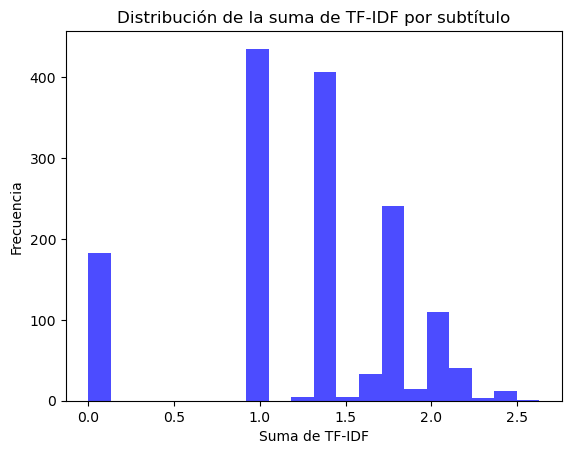

In [112]:
import matplotlib.pyplot as plt

plt.hist(df['tfidf_sum'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de la suma de TF-IDF por subtítulo')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Frecuencia')

plt.show()

Podemos separar subtítulos en rangos de TF-IDF y observar algunos para entender como se plasma esa diferencia en el índice.

In [113]:
threshold=1.5
subtitulos_altos = df[df['tfidf_sum'] > threshold]
subtitulos_bajos = df[df['tfidf_sum'] < threshold]

In [114]:
print('subtitulos_altos:')
subtitulos_altos[['subtitulo','tfidf_sum']].sample(5)

subtitulos_altos:


,subtitulo,tfidf_sum
948,- Déjame arreglarlo. - Buena idea.,1.996037
482,Mi hijo está aquí con la au pair.,1.985623
902,Y también tengo chocolate. Energía para toda la noche.,1.724636
1473,"- ¿Te gustó el zoo, chaval? - Ha sido genial.",1.996664
194,- He bebido demasiado café. - No importa.,1.730646


Mi interpretación es que un alto TF-IDF resulta para subtítulos con gran valor de contenido impactante. Son como fraces que podemos recordar y asociar a la película.

In [115]:
print('subtitulos_bajos:')
subtitulos_bajos[['subtitulo','tfidf_sum']].sample(5)

subtitulos_bajos:


,subtitulo,tfidf_sum
362,Allá va.,1.398821
766,Soy un luchador.,0.000000
751,- He dicho... - No diré nada.,1.412532
846,Estoy haciendo todo por ti.,1.000000
838,¿Era eso?,0.000000


Para un bajo TF-IDF es todo lo contrario, en general son fraces menos impactantes.

En el siguiente gráfico se representa el eje x coincidente con el gráfico anterior pero en el se plasma la evaluación de sentimientos resultante.
De ésta manera se puede tener una visión general de como se distribuye el sentimiento en toda la película.

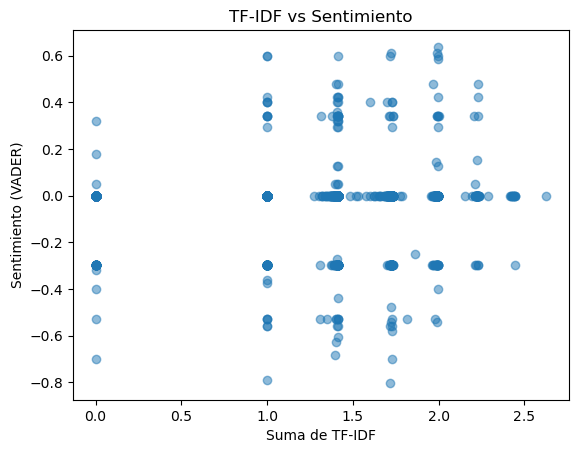

In [116]:
plt.scatter(df['tfidf_sum'], df['sentimientoVader'], alpha=0.5)
plt.title('TF-IDF vs Sentimiento')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Sentimiento (VADER)')
plt.show()

### Nube de Palabras

In [48]:
X = tfidf.fit_transform(df['subtitulo'])

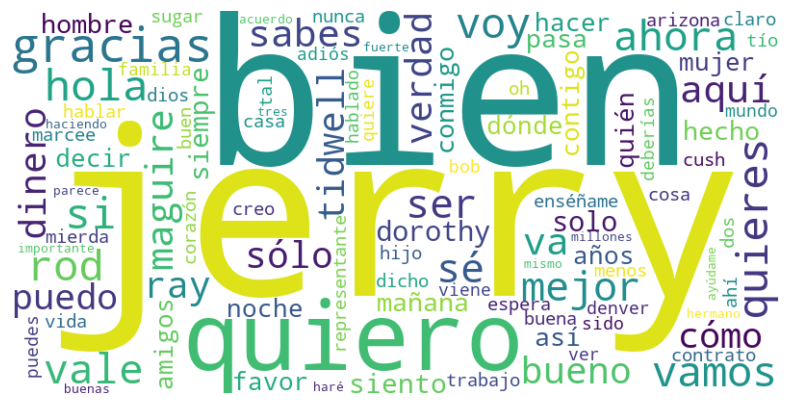

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener las palabras y sus puntuaciones TF-IDF
# Aquí estamos utilizando el atributo `get_feature_names_out()` que te da las palabras,
# y el atributo `toarray()` para obtener las puntuaciones de TF-IDF
words = tfidf.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1  # Sumar las puntuaciones de cada palabra

# Crear un diccionario de palabras con sus correspondientes puntuaciones
word_dict = dict(zip(words, tfidf_scores))

# Generar la nube de palabras con las palabras y puntuaciones obtenidas
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
# Generar la nube de palabras con algunas opciones de personalización
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate_from_frequencies(word_dict)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()